<h2>Creating Model</h2>

step : 

1. split the data into train and test
2. train the model
3. tune the model
4. evaluate the model
5. save the model


Model that will be used : 

1. Logistic Regression
2. Random Forest
3. XGBoost
4. Neural Network (Optional)

last thing : 

- Hyperparameter Tuning : 
    Grid Search or randomized search for optimation parameter


start with splitting the data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for model building & evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# for the model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
data = pd.read_excel('preped_data.xlsx')
data_model = data.copy()
data_model = data_model.drop(["customerID"], axis = 1)

data_model.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,2609,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3022,0


In [53]:
# set targer and feature
x = data_model.drop(['Churn'], axis = 1)
y = data_model['Churn']

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((5634, 19), (1409, 19), (5634,), (1409,))

In [54]:

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('cat', cat_pipe, categorical_features)
    ])


# model for pipeline
models = {  
    "Logistic Regression": LogisticRegression(max_iter=1000),  
    "Random Forest": RandomForestClassifier(n_estimators=100),  
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")  
}



===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



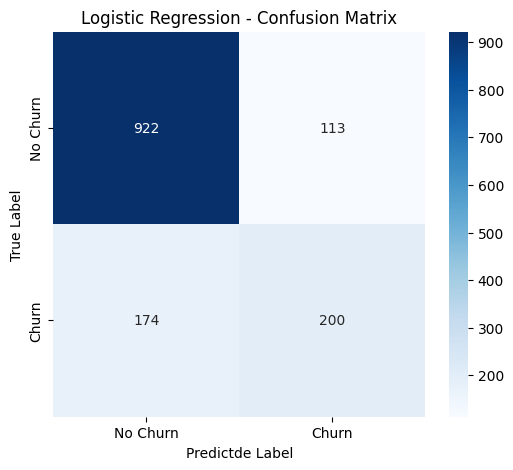

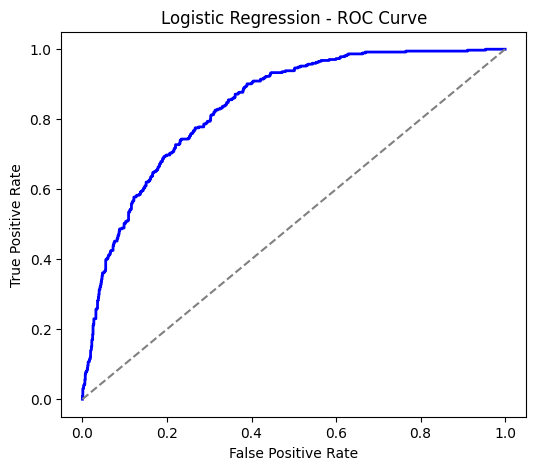


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



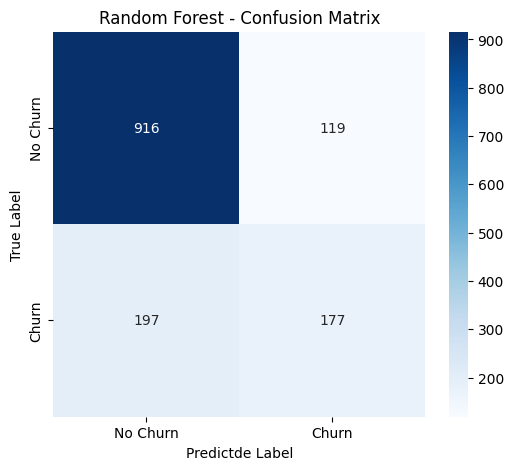

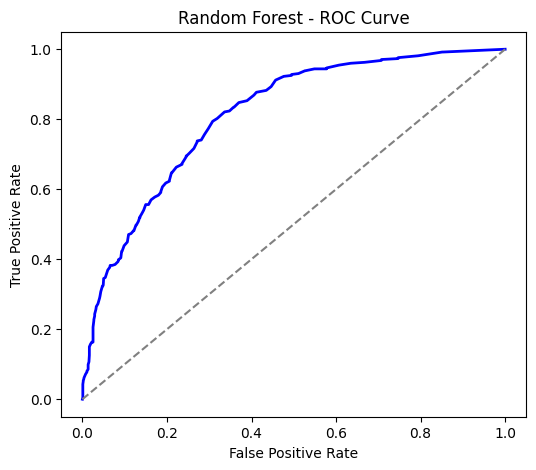


===== XGBoost =====


c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.59      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



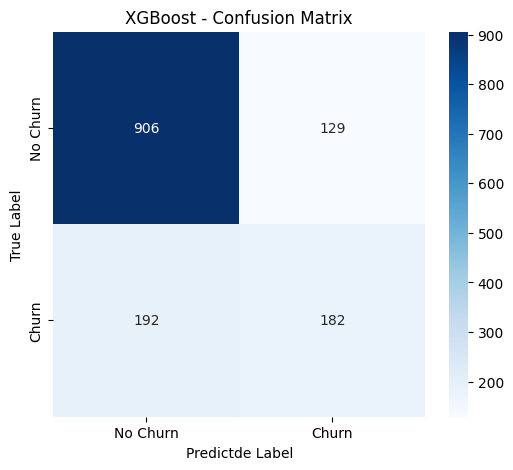

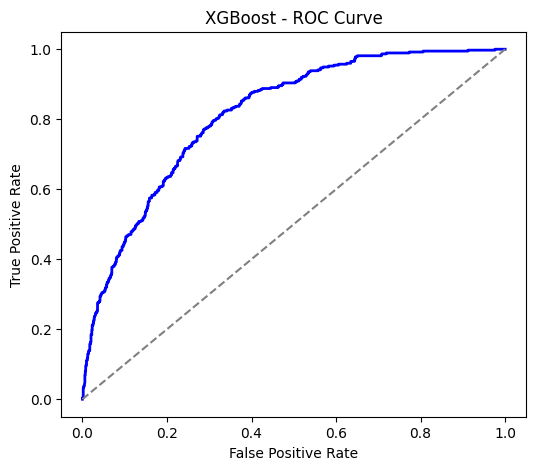

In [55]:
# Train model, evaluate, and visualize
for model_name, model in models.items():
    print(f"\n===== {model_name} =====")

    # Creating Pipeline 
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    #train model
    pipeline.fit(x_train, y_train)

    # Predict
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1] # probability for the positie churn


    # print classification report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize = (6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predictde Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve 
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color = "blue", lw = 2, label = f"AUC = {roc_auc : .2f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend
    plt.show()

<h2>Churn Prediction Analysis</h2>

Based on the evaluation results using three different algorithms: Logistic Regression, Random Forest, and XGBoost, the following conclusions can be drawn:

1. Logistic Regression
    - Accuracy: 80%
    - Precision for Churn (1): 0.64
    - Recall for Churn (1): 0.53
    - F1-score for Churn (1): 0.58
    Analysis:
        - The model performs well in classifying non-churn customers.
        - However, the recall for churn is quite low (only 53%), meaning it fails to detect many actual churn customers.
        - Precision is higher than recall, which means the model is cautious about falsely classifying customers as churn.
2. Random Forest
    - Accuracy: 78%
    - Precision for Churn (1): 0.60
    - Recall for Churn (1): 0.48
    - F1-score for Churn (1): 0.53
    Analysis:
        - This model performs slightly worse than LogisticRegression, especially in detecting churn customers.
        - Recall is only 48%, meaning many churn customers are missed.
        - Overall accuracy is decent, but the model needs improvement in churn detection.
3. XGBoost
    - Accuracy: 77%
    - Precision for Churn (1): 0.59
    - Recall for Churn (1): 0.49
    - F1-score for Churn (1): 0.53
    Analysis:
        - XGBoost performs similarly to Random Forest but has slightly better recall for churn.
        - Precision and recall remain low, indicating the model is still not optimal in identifying churn customers.
    

<h2>Conclusion</h2>

1. Logistic Regression is the best model among the three, with the highest accuracy (80%) and better F1-score for churn.
2. XGBoost could be a potential alternative if further optimized, as it balances precision and recall.
3. Improvement needed for churn recall to enhance detection of actual churn customers.
4. Strategies for improvement:
    - Adjusting the prediction threshold to improve recall.
    - Using data balancing techniques such as oversampling (SMOTE) or undersampling.
    - Hyperparameter tuning for Random Forest and XGBoost to enhance performance.

<h2>Tune Model</h2>

1. Grid Search
2. Randomized Search


- Logistic Regression : no need to tune, because it is simple model and its good as it is
- Random forest : will get tune with Grid Search
- XGBoost : will get tune with Randomized Search



In [56]:
# Hyperparameter Tuning for Random Forest and XGBoost

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


rf_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

xgb_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 6, 9],
    "model__subsample": [0.8, 1],
    "model__colsample_bytree": [0.8, 1]
}

# Dictionary to store trained models
trained_models = {}

# Dictionary to store classification reports
classification_reports = {}


# saving model that will tuned

tuned_models = {
    "Logistic Regression_tuned": LogisticRegression(max_iter=1000),  # No tuning
    "Random Forest_tuned": GridSearchCV(Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier())
    ]), param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1),
    "XGBoost_tuned": RandomizedSearchCV(Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
    ]), param_distributions=xgb_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
}



===== Logistic Regression_tuned =====
Saved Logistic Regression_tuned successfully!
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



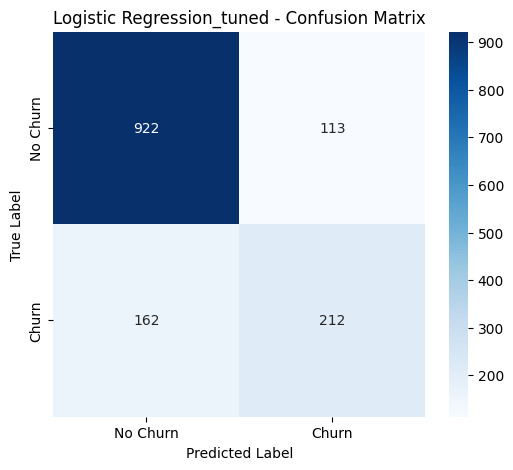

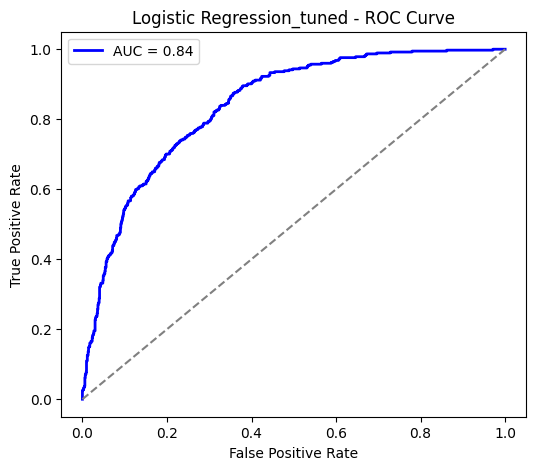


===== Random Forest_tuned =====
Best Params for Random Forest_tuned: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Saved Random Forest_tuned successfully!
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



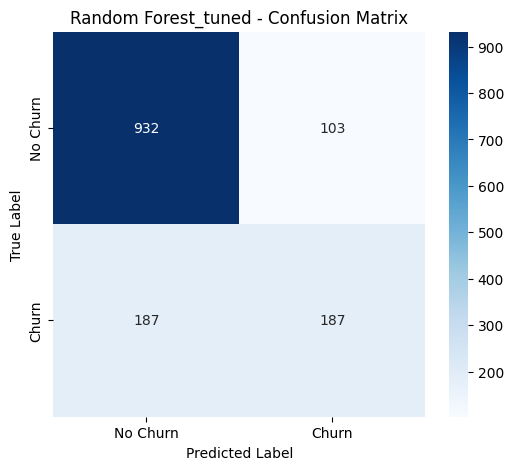

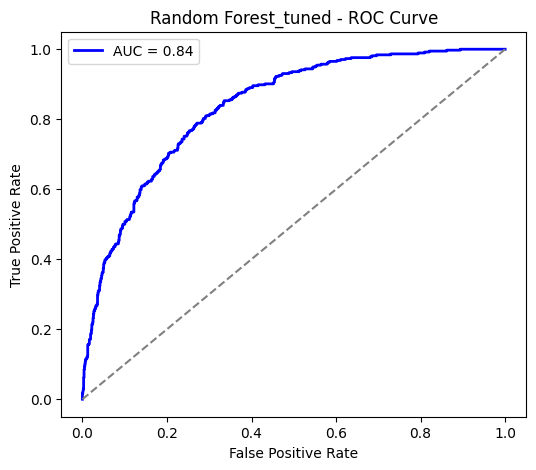


===== XGBoost_tuned =====


c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Best Params for XGBoost_tuned: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.8}
Saved XGBoost_tuned successfully!
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.69      0.47      0.56       374

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



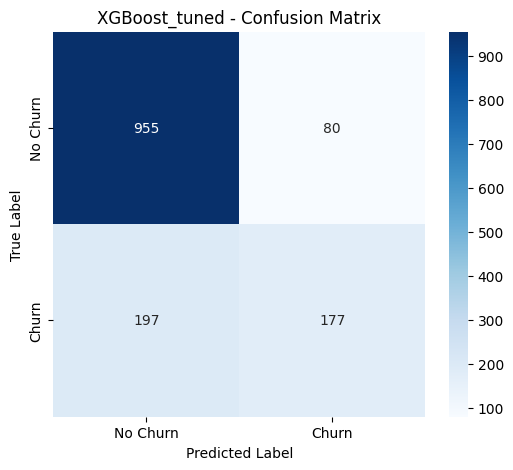

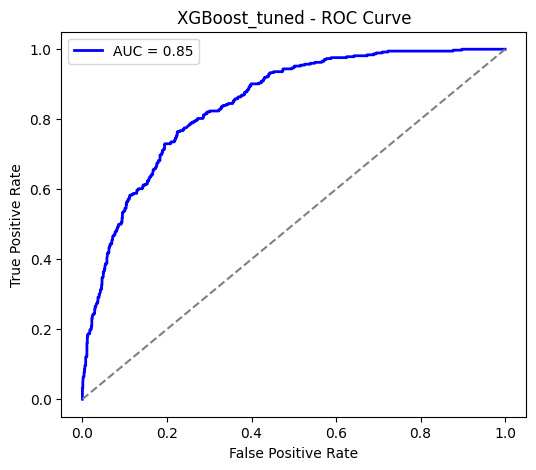

All classification reports saved successfully!


In [57]:
import joblib

# Train, Evaluate, and Save Models
for model_name, model in tuned_models.items():
    print(f"\n===== {model_name} =====")

    if model_name == "Logistic Regression_tuned":
        model.fit(x_train, y_train)
        best_model = model  # No tuning, use as is
    else:
        model.fit(x_train, y_train)
        best_model = model.best_estimator_
        print(f"Best Params for {model_name}: {model.best_params_}")

    # Save the trained model
    trained_models[model_name] = best_model
    joblib.dump(best_model, f"{model_name}.pkl")
    print(f"Saved {model_name} successfully!")

    # Predictions
    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)[:, 1]  # Probability for the positive class

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[model_name] = report  # Corrected dictionary name
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

# Save classification reports to a CSV file
df_reports = pd.DataFrame(classification_reports).T
df_reports.to_csv("classification_reports.csv")
print("All classification reports saved successfully!")

# **Machine Learning Model Evaluation for Churn Prediction**  

## **1. Introduction**  
Churn prediction is a binary classification problem where the model must predict whether a customer will churn (leave) or remain subscribed (no churn). In this evaluation, three models are tested: **Logistic Regression, Random Forest, and XGBoost**.  

The evaluation is conducted using **Confusion Matrix, Precision, Recall, F1-score, and ROC Curve** to compare the performance of each model.  

---

## **2. Model Evaluation Results**  
Below is a summary of the evaluation results for each model:  

| Model                | Accuracy | Precision (Churn) | Recall (Churn) | F1-score (Churn) |
|----------------------|----------|------------------|---------------|----------------|
| **Logistic Regression** | 80%      | 65%              | 57%           | 61%            |
| **Random Forest**       | 79%      | 64%              | 50%           | 56%            |
| **XGBoost**            | 80%      | 69%              | 47%           | 56%            |

---

## **3. Analysis of Results**  

### **a. Logistic Regression (Tuned)**  
- **Accuracy:** 80%  
- **Precision (Churn):** 65% → 65% of predicted churn cases are actually churn.  
- **Recall (Churn):** 57% → Detects 57% of actual churn customers.  
- **F1-score (Churn):** 61% → Balanced measure between precision and recall.  
- This model serves as a **strong baseline**, performing relatively well in both precision and recall.  

### **b. Random Forest (Tuned)**  
- **Accuracy:** 79%  
- **Precision (Churn):** 64% → Slightly lower than Logistic Regression.  
- **Recall (Churn):** 50% → Detects only 50% of actual churners, meaning more churners are missed.  
- **F1-score (Churn):** 56% → Lower than Logistic Regression due to reduced recall.  
- **Best Hyperparameters:**  
  - `max_depth=10`
  - `min_samples_leaf=2`
  - `min_samples_split=2`
  - `n_estimators=100`  
- Even after tuning, the **recall is still relatively low**, meaning the model struggles to identify churners.  

### **c. XGBoost (Tuned)**  
- **Accuracy:** 80%  
- **Precision (Churn):** 69% → The highest among all models.  
- **Recall (Churn):** 47% → Lowest recall, meaning many churners are not detected.  
- **F1-score (Churn):** 56% → Similar to Random Forest, but with better precision.  
- **Best Hyperparameters:**  
  - `subsample=0.8`
  - `n_estimators=300`
  - `max_depth=3`
  - `learning_rate=0.01`
  - `colsample_bytree=0.8`  
- **Strength:** Reduces **false positives** (incorrectly classifying a non-churner as churn).  
- **Weakness:** Performs **poorly in capturing actual churn customers** due to low recall.  

---

## **4. Conclusion & Recommendations**  

### **Key Findings:**  
- **Recall needs improvement** to better detect churn customers.  
- **XGBoost has the highest precision but the lowest recall**, making it **less effective in detecting actual churners**.  
- **Logistic Regression has the best balance** between precision and recall.  

### **Strategies to Improve Model Performance:**  
✅ **Handle class imbalance** using **oversampling or undersampling** techniques (e.g., **SMOTE**).  
✅ **Feature engineering** to identify stronger predictors of churn.  
✅ **Hyperparameter tuning** to increase recall while maintaining precision.  
✅ **Experimenting with other models**, such as **Gradient Boosting or SVM**, to achieve better performance.  

By implementing these improvements, the model can provide **more accurate insights**, helping businesses take **proactive actions** to reduce customer churn. 🚀  
